In [1]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


In [2]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv('A:\diabetes.csv', header=None, names=col_names)

In [3]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [4]:
pima.shape

(769, 9)

In [5]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [6]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima.columns = col_names
col_names

['pregnant',
 'glucose',
 'bp',
 'skin',
 'insulin',
 'bmi',
 'pedigree',
 'age',
 'label']

In [7]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [8]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769 entries, 0 to 768
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   pregnant  769 non-null    object
 1   glucose   769 non-null    object
 2   bp        769 non-null    object
 3   skin      769 non-null    object
 4   insulin   769 non-null    object
 5   bmi       769 non-null    object
 6   pedigree  769 non-null    object
 7   age       769 non-null    object
 8   label     769 non-null    object
dtypes: object(9)
memory usage: 54.2+ KB


In [9]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
for col in col_names:
    print(pima[col].value_counts())

1              135
0              111
2              103
3               75
4               68
5               57
6               50
7               45
8               38
9               28
10              24
11              11
13              10
12               9
14               2
17               1
15               1
Pregnancies      1
Name: pregnant, dtype: int64
100    17
99     17
129    14
111    14
106    14
       ..
177     1
160     1
62      1
44      1
190     1
Name: glucose, Length: 137, dtype: int64
70               57
74               52
78               45
68               45
72               44
64               43
80               40
76               39
60               37
0                35
62               34
66               30
82               30
88               25
84               23
90               22
86               21
58               21
50               13
56               12
54               11
52               11
75                8
92                

In [10]:
pima['pregnant'].value_counts()

1              135
0              111
2              103
3               75
4               68
5               57
6               50
7               45
8               38
9               28
10              24
11              11
13              10
12               9
14               2
17               1
15               1
Pregnancies      1
Name: pregnant, dtype: int64

In [11]:
pima.isnull().sum()

pregnant    0
glucose     0
bp          0
skin        0
insulin     0
bmi         0
pedigree    0
age         0
label       0
dtype: int64

In [12]:
X = pima.drop(['pregnant'], axis=1)
y = pima['pregnant']

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 11)

In [14]:
X_train.shape, X_test.shape

((515, 8), (254, 8))

In [15]:
# check data types in X_train

X_train.dtypes

glucose     object
bp          object
skin        object
insulin     object
bmi         object
pedigree    object
age         object
label       object
dtype: object

In [16]:
X_train.head()

,glucose,bp,skin,insulin,bmi,pedigree,age,label
483,85,58,22,49,27.8,0.306,28,0
184,73,60,0,0,26.8,0.268,27,0
740,102,74,0,0,39.5,0.293,42,1
540,129,92,49,155,36.4,0.968,32,1
649,136,84,35,130,28.3,0.26,42,1


In [17]:
# import category encoders

import category_encoders as ce

In [18]:
print(X_train.columns)

Index(['glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label'], dtype='object')


In [19]:

# encode variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [20]:
X_train.head()

,glucose,bp,skin,insulin,bmi,pedigree,age,label
483,1,1,1,1,1,1,1,1
184,2,2,2,2,2,2,2,1
740,3,3,2,2,3,3,3,2
540,4,4,3,3,4,4,4,2
649,5,5,4,4,5,5,3,2


In [21]:
X_test.head()

,glucose,bp,skin,insulin,bmi,pedigree,age,label
180,76.0,34.0,2.0,2.0,159.0,-1.0,23.0,2
761,27.0,1.0,32.0,-1.0,133.0,-1.0,6.0,1
433,123.0,3.0,41.0,119.0,13.0,342.0,6.0,1
169,34.0,17.0,2.0,2.0,64.0,321.0,15.0,1
46,80.0,17.0,11.0,2.0,-1.0,-1.0,19.0,2


In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [24]:
y_pred_gini = clf_gini.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.2008


In [26]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array(['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1',
       '1', '2', '0', '0', '1', '1', '0', '0', '1', '0', '0', '0', '1',
       '1', '1', '1', '0', '0', '1', '1', '1', '0', '0', '1', '1', '0',
       '4', '4', '1', '0', '0', '4', '4', '1', '1', '0', '0', '7', '0',
       '4', '0', '0', '1', '1', '4', '0', '0', '0', '0', '4', '1', '4',
       '1', '2', '0', '0', '1', '1', '4', '1', '1', '1', '7', '1', '1',
       '4', '1', '0', '4', '7', '4', '0', '1', '0', '1', '0', '1', '1',
       '4', '1', '1', '1', '0', '0', '1', '0', '0', '4', '1', '1', '1',
       '4', '1', '0', '2', '1', '1', '4', '4', '4', '1', '1', '4', '7',
       '4', '4', '0', '4', '4', '0', '0', '1', '1', '0', '1', '0', '4',
       '4', '1', '1', '4', '4', '0', '1', '1', '1', '4', '0', '1', '0',
       '4', '1', '0', '0', '1', '4', '7', '0', '4', '1', '4', '1', '0',
       '4', '1', '1', '1', '0', '1', '1', '1', '1', '0', '0', '0', '0',
       '1', '4', '0', '1', '1', '0', '1', '1', '4', '7', '1', '0

In [27]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.2641


In [28]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.2641
Test set score: 0.2008


[Text(0.5, 0.875, 'x[6] <= 21.5\ngini = 0.895\nsamples = 515\nvalue = [72, 94, 15, 9, 6, 6, 1, 1, 1, 63, 53, 49, 39\n30, 31, 25, 19, 1]'),
 Text(0.25, 0.625, 'x[2] <= 7.5\ngini = 0.86\nsamples = 358\nvalue = [63, 83, 5, 3, 3, 4, 1, 0, 0, 55, 46, 29, 22\n15, 11, 13, 5, 0]'),
 Text(0.125, 0.375, 'x[4] <= 120.5\ngini = 0.885\nsamples = 148\nvalue = [25, 15, 4, 2, 1, 1, 0, 0, 0, 25, 19, 19, 11\n7, 7, 9, 3, 0]'),
 Text(0.0625, 0.125, 'gini = 0.886\nsamples = 113\nvalue = [19, 13, 4, 2, 1, 1, 0, 0, 0, 19, 17, 8, 9, 5\n5, 7, 3, 0]'),
 Text(0.1875, 0.125, 'gini = 0.823\nsamples = 35\nvalue = [6, 2, 0, 0, 0, 0, 0, 0, 0, 6, 2, 11, 2, 2\n2, 2, 0, 0]'),
 Text(0.375, 0.375, 'x[1] <= 1.5\ngini = 0.818\nsamples = 210\nvalue = [38, 68, 1, 1, 2, 3, 1, 0, 0, 30, 27, 10, 11\n8, 4, 4, 2, 0]'),
 Text(0.3125, 0.125, 'gini = 0.375\nsamples = 8\nvalue = [0, 2, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0\n0, 0, 0, 0]'),
 Text(0.4375, 0.125, 'gini = 0.818\nsamples = 202\nvalue = [38, 66, 1, 1, 2, 3, 1, 0, 0, 24, 27, 10,

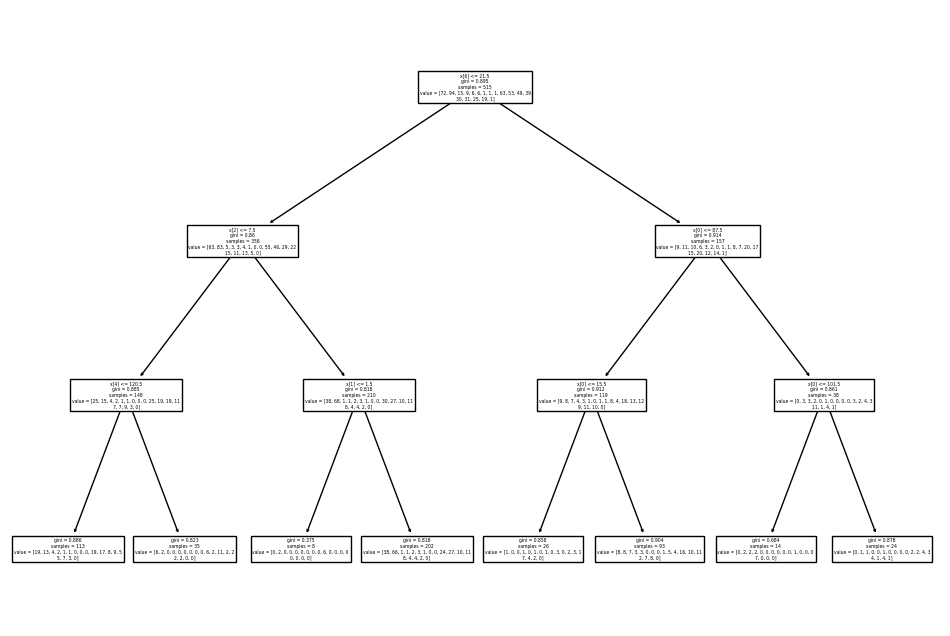

In [29]:
import matplotlib.pyplot as plt # data visualization
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

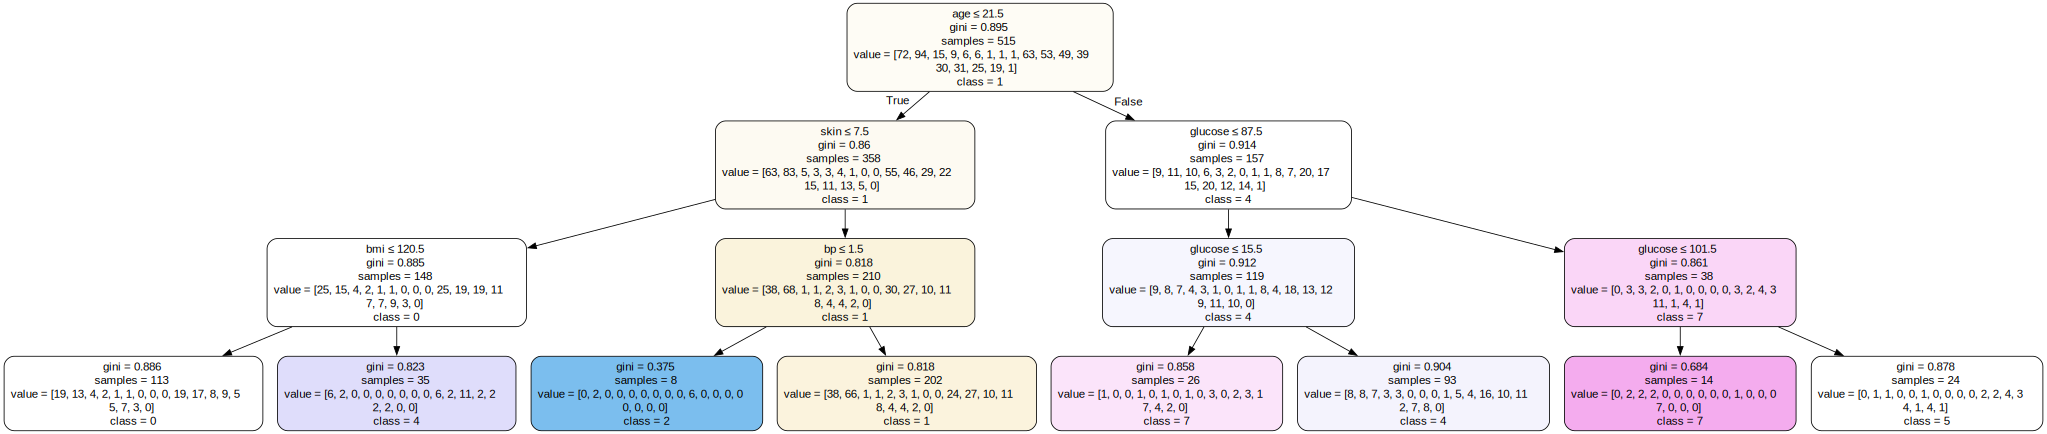

In [30]:
import graphviz
from sklearn.tree import export_graphviz

# Assuming clf_gini is your DecisionTreeClassifier instance
# Automatically use the model's classes
dot_data = export_graphviz(clf_gini, out_file=None, 
                           feature_names=X_train.columns,  
                           class_names=[str(cls) for cls in clf_gini.classes_],  # Convert class names to string if they are not
                           filled=True, rounded=True,  
                           special_characters=True)

graph = graphviz.Source(dot_data)
graph

In [34]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred_en = model.predict(X_test)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 6  5  1  1  0  1  0  3 13  1  1  1  1  3  2  0]
 [ 5  8  1  0  0  1  0  7  7  2  2  3  3  1  0  1]
 [ 1  1  0  1  0  0  1  1  0  0  0  0  2  0  2  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  2  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 5  7  1  1  0  1  1  2  9  6  3  0  2  0  2  0]
 [ 4  3  1  0  0  0  0  3  4  5  0  0  1  1  0  0]
 [ 2  3  0  0  2  2  0  3  0  2  2  1  2  0  0  0]
 [ 1  0  2  0  0  0  0  4  2  1  3  2  2  1  0  0]
 [ 1  0  1  0  0  1  0  1  3  2  0  1  4  5  1  0]
 [ 0  1  0  1  0  0  0  1  0  2  2  0  2  2  3  0]
 [ 1  2  0  1  0  0  1  1  1  1  3  0  1  0  1  0]
 [ 1  0  0  0  0  0  0  1  2  3  0  0  2  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]]


In [35]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       0.21      0.15      0.18        39
           1       0.26      0.20      0.22        41
          10       0.00      0.00      0.00         9
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         3
          13       0.14      0.25      0.18         4
          14       0.00      0.00      0.00         1
           2       0.07      0.05      0.06        40
           3       0.10      0.18      0.13        22
           4       0.07      0.11      0.08        19
           5       0.19      0.17      0.18        18
           6       0.12      0.05      0.07        20
           7       0.09      0.14      0.11        14
           8       0.00      0.00      0.00        13
           9       0.00      0.00      0.00         9
 Pregnancies       0.00      0.00      0.00         0

    accuracy                           0.11       254
   macro avg       0.08   

C:\Users\Akash Kumar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Akash Kumar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Akash Kumar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


In [37]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.1220472440944882
